In [24]:
from lshash import LSHash
import numpy as np
import pandas as pd
import math

Least_Distance = 0.5 #km

In [25]:
lsh = LSHash(15,2)

In [26]:
df = pd.read_csv('crime_filtered.csv')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182015459,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,329,NaN,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,42.306734,-71.077127,"(42.30673444, -71.07712722)"
1,I182015459,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",B2,329,NaN,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,42.306734,-71.077127,"(42.30673444, -71.07712722)"
2,I182015313,1830,Drug Violation,DRUGS - SICK ASSIST - HEROIN,B3,457,NaN,2/27/18 12:01,2018,2,Tuesday,12,Part Two,ESMOND ST,42.298620,-71.085110,"(42.29861988, -71.08511004)"
3,I182015294,1845,Drug Violation,DRUGS - POSS CLASS D,A7,25,NaN,2/27/18 11:21,2018,2,Tuesday,11,Part Two,WHITE ST,42.380532,-71.035104,"(42.38053192, -71.03510439)"
4,I182015238,1806,Drug Violation,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
5,I182015238,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
6,I182015238,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,E18,494,NaN,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,42.259780,-71.116231,"(42.25977993, -71.11623073)"
7,I182015120,1815,Drug Violation,DRUGS - POSSESSION,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"
8,I182015120,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"
9,I182015120,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,C11,363,NaN,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,42.294266,-71.059685,"(42.29426595, -71.05968487)"


In [27]:
crime_loc_18 = []
crime_loc_17 = []
crime_loc_16 = []
crime_loc_15 = []

for row in df.itertuples():
    if row.Location != "(0.00000000, 0.00000000)":
        if row.OCCURRED_ON_DATE.split()[0].split("/")[2] == "18":
            crime_loc_18.append([row.Long,row.Lat])
        elif row.OCCURRED_ON_DATE.split()[0].split("/")[2] == "17":
            crime_loc_17.append([row.Long,row.Lat])
        elif row.OCCURRED_ON_DATE.split()[0].split("/")[2] == "16":
            crime_loc_16.append([row.Long,row.Lat])
        elif row.OCCURRED_ON_DATE.split()[0].split("/")[2] == "15":
            crime_loc_15.append([row.Long,row.Lat])
        #crime_loc.append([row.Long,row.Lat])

In [28]:
len(crime_loc_18)

592

In [29]:
df2 = pd.read_csv('Public_Schools.csv')
df2

,X,Y,OBJECTID_1,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,...,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,Label,TLT,PL,POINT_X,POINT_Y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,,,52,3,Tommy,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,,,72,3,Tommy,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,,,106,3,Tommy,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,,,103,3,Tommy,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,,,36,4,Jonathan,781823.000004,2.964190e+06
5,-71.040330,42.378290,6,6,8,Umana / Barnes Bldg,312 Border Street,East Boston,2128,4323,...,Umana Academy,Umana Academy,K-8,,,124,3,Tommy,780367.000002,2.963210e+06
6,-71.034120,42.369676,7,7,10,East Boston Eec Bldg,135 Gove Street,East Boston,2128,4450,...,East Boston EEC,East Boston EEC,ELC,,,35,3,Tommy,782062.000004,2.960080e+06
7,-71.034308,42.369274,8,8,11,Mckay Bldg,122 Cottage Street,East Boston,2128,4360,...,McKay K-8,McKay K-8,K-8,,,89,3,Tommy,782012.096740,2.959933e+06
8,-71.034890,42.365563,9,9,12,Adams Bldg,165 Webster Street,East Boston,2128,4361,...,Adams Elementary,Adams,ES,,,1,3,Tommy,781862.000004,2.958580e+06
9,-71.057492,42.376629,10,10,13,Harvard-Kent,50 Bunker Hill Street,Charlestown,2129,4280,...,Harvard/Kent Elem,Harvard/Kent,ES,,,55,3,Tommy,775732.999998,2.962580e+06


In [30]:
sch_loc = []
for row in df2.itertuples():
    sch_loc.append([row.X,row.Y])
    lsh.index([row.X,row.Y])

In [31]:
k = lsh.query([-71.09791405,42.31433402])

##########


In [32]:
len(k)

128

In [33]:
k

[((-71.09812020643957, 42.313937883276786), 1.994247810542603e-07),
 ((-71.09929060184345, 42.314128662932774), 1.937066502763108e-06),
 ((-71.10161060258062, 42.3165586643393), 1.861354341767564e-05),
 ((-71.09289159544575, 42.316334299557376), 2.922616805717957e-05),
 ((-71.09202957055001, 42.317660189389244), 4.569050120330721e-05),
 ((-71.10349060174734, 42.30892866266553), 6.0315817304030234e-05),
 ((-71.0878410542977, 42.31574003488177), 0.00010344212026636326),
 ((-71.10583938257344, 42.321785327085706), 0.00011833287368510312),
 ((-71.09104059939536, 42.32554866561233), 0.00017301259942472465),
 ((-71.08630956667422, 42.32094834318213), 0.00017841330441609751),
 ((-71.08450059643428, 42.316158664034354), 0.0001832500624117949),
 ((-71.10960060443752, 42.30600866079933), 0.00020588716044121064),
 ((-71.10691069018256, 42.325622122989714), 0.00020836080368089022),
 ((-71.10693577080225, 42.32629275723332), 0.00022440284244941937),
 ((-71.11295060607237, 42.318508663764156), 0.000

In [34]:
def deg2rad(deg):
    return deg * (math.pi/180)

def distance(loc_sch,loc_query):
    R = 6371
    dLat = deg2rad(loc_query[1] - loc_sch[1])  # latitude weidu
    dLon = deg2rad(loc_query[0] - loc_sch[0])  #longitude jingdu
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(deg2rad(loc_sch[0])) * math.cos(deg2rad(loc_query[0])) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))
    d = R * c
    #return in km
    
    return d

In [35]:
distance([-71.114482185326253, 42.307208292864132],[-71.09791405,42.31433402])

0.9918147046316105

In [36]:
def knn(crime_loc):
    result = []
    for i in crime_loc:
        k = lsh.query(i)
        try:
            if distance(list(k[0][0]),i) <= Least_Distance:
                result.append(i)
                tmp+=1
        except Exception as e:
            #print("----")
            continue
    return result

In [37]:
result_15 = knn(crime_loc_15)
result_16 = knn(crime_loc_16)
result_17 = knn(crime_loc_17)
result_18 = knn(crime_loc_18)

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

In [38]:
# import folium
# map_osm = folium.Map(location=[42.30673444, -71.07712722])

In [39]:
# for i in result_15:
#     folium.Marker(i).add_to(map_osm)

In [40]:
import matplotlib.pyplot as plt

np_15 = np.array(result_15)
sch = np.array(sch_loc)

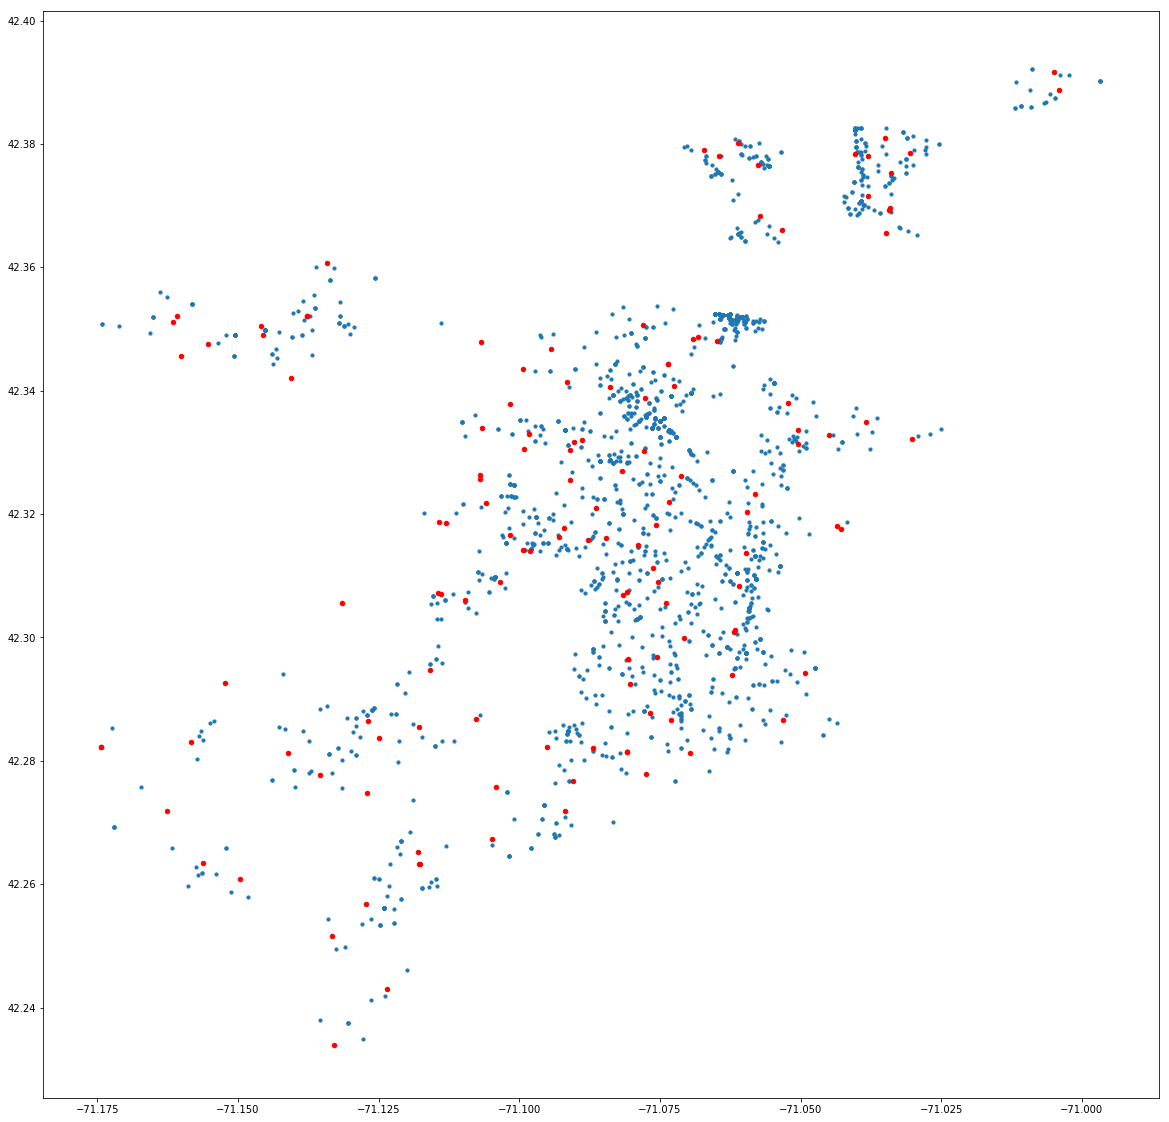

In [41]:
plt.figure(figsize = (20,20))
plt.scatter(np_15[:,0],np_15[:,1],s=10)
plt.scatter(sch[:,0],sch[:,1],s=20,color = "red")
plt.show()

In [42]:
for i in crime_loc_15:
    lsh.index(i)

In [43]:
def knn_2(sch_loc):
    result = []
    for i in sch_loc:
        tmp = 0
        knn_crime = lsh.query(i)
        try:
            for each_crime in knn_crime:
                if distance(list(each_crime[0]),i) <= Least_Distance:
                    tmp+=1
            result.append([i,tmp])
        except Exception as e:
            #print("----")
            continue
    return result

In [44]:
reverse_result_15 = knn_2(sch_loc)

##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

In [45]:
reverse_result_15.sort(reverse=True,key=lambda x:x[1])


In [46]:
reverse_result_15

[[[-71.07774059582496, 42.338758668670366], 75],
 [[-71.07790901897478, 42.330275209898616], 71],
 [[-71.06814953601999, 42.34876970981879], 71],
 [[-71.06905024656571, 42.348408293305276], 65],
 [[-71.06492059233261, 42.34797867054077], 65],
 [[-71.0878410542977, 42.31574003488177], 61],
 [[-71.07619659348022, 42.31129966337307], 60],
 [[-71.07541082496643, 42.30905402291017], 59],
 [[-71.09202957055001, 42.317660189389244], 59],
 [[-71.08879259908205, 42.332038667227394], 57],
 [[-71.08450059643428, 42.316158664034354], 57],
 [[-71.07893912909216, 42.31496685447941], 56],
 [[-71.06101177191944, 42.30839621193607], 56],
 [[-71.05976976012546, 42.31368761178382], 56],
 [[-71.07562660083664, 42.3182026505098], 55],
 [[-71.07337366277201, 42.32192747253831], 55],
 [[-71.06182116188056, 42.30082133138399], 55],
 [[-71.07246106627973, 42.340737551544926], 54],
 [[-71.08383997549593, 42.34055977442439], 54],
 [[-71.09289159544575, 42.316334299557376], 53],
 [[-71.061729420578, 42.3011287910

In [51]:
df = pd.DataFrame(reverse_result_15).to_csv('Drug-Arrest-Around-School.csv')